In [15]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Oct 30 10:25:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:03:00.0  On |                  N/A |
| 32%   56C    P0    48W / 175W |   5123MiB /  8192MiB |     17%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
from fastai.vision.all import *
import timm

In [17]:
print(torch.__version__)

1.12.1+cu102


In [18]:
path = untar_data(URLs.PETS)

In [19]:
path.ls()

(#2) [Path('/home/thomas/.fastai/data/oxford-iiit-pet/images'),Path('/home/thomas/.fastai/data/oxford-iiit-pet/annotations')]

In [20]:
files = get_image_files(path/"images")
len(files)

7390

In [21]:
files[0]

Path('/home/thomas/.fastai/data/oxford-iiit-pet/images/Russian_Blue_29.jpg')

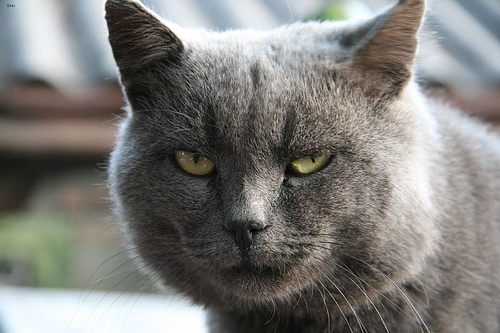

In [22]:
im = Image.open("/home/thomas/.fastai/data/oxford-iiit-pet/images/Russian_Blue_29.jpg")
im

In [23]:
files[7]

Path('/home/thomas/.fastai/data/oxford-iiit-pet/images/shiba_inu_158.jpg')

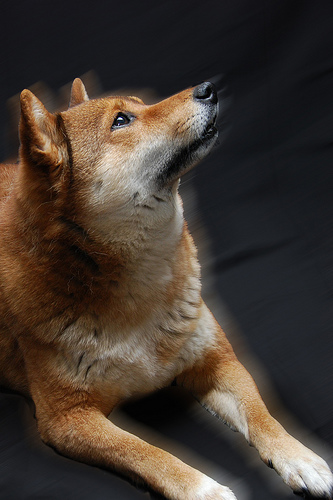

In [24]:
im2 = Image.open("/home/thomas/.fastai/data/oxford-iiit-pet/images/shiba_inu_158.jpg")
im2

In [25]:
def is_cat(x): return x[0].isupper() 

In [26]:
dls = ImageDataLoaders.from_name_func(
    path,
    files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    label_func=is_cat, 
    item_tfms=Resize(192))

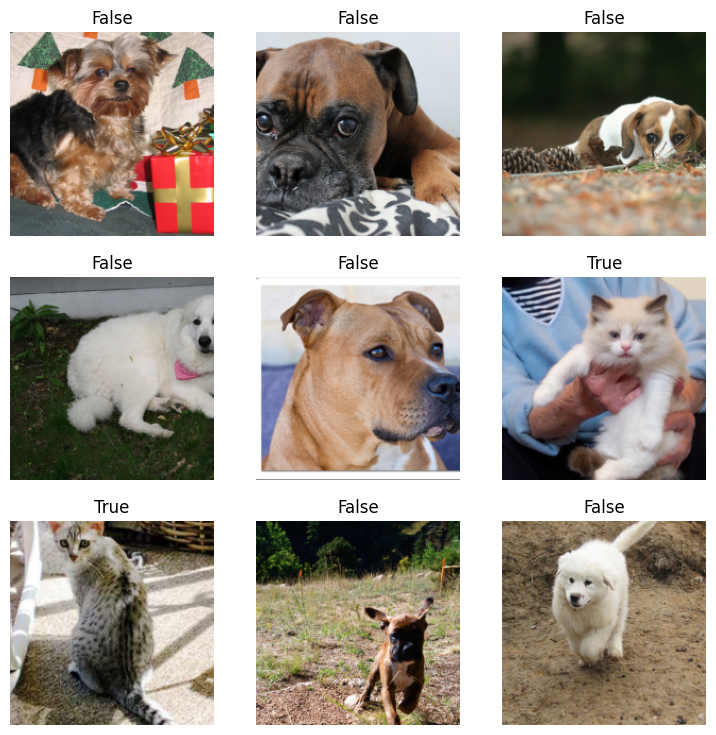

In [27]:
dls.show_batch()

In [28]:
learn = vision_learner(dls, 'resnet18', metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.187707,0.043838,0.009472,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.070562,0.035872,0.013532,00:14


In [29]:
learn.predict(files[0])

('True', TensorBase(1), TensorBase([4.5355e-15, 1.0000e+00]))

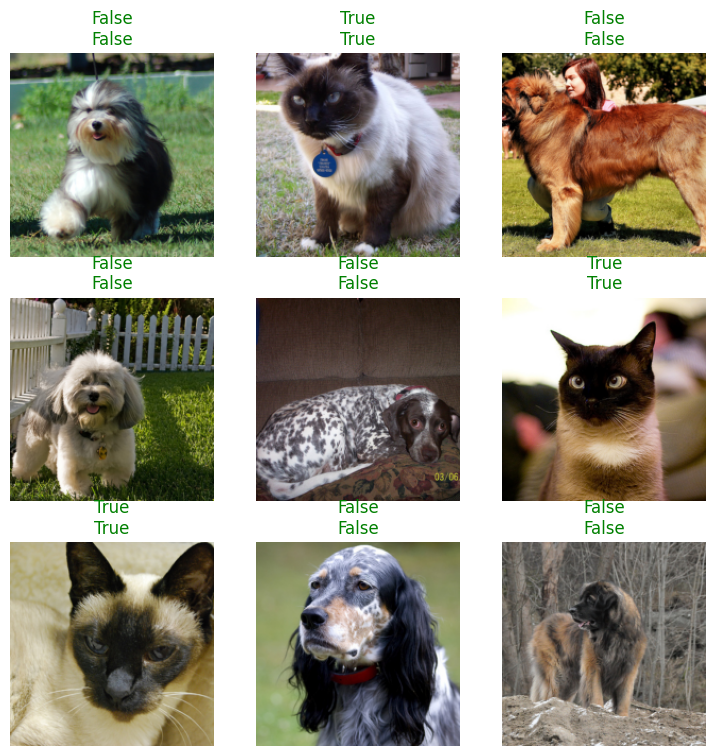

In [30]:
learn.show_results()

In [31]:
learn.path = Path('.')
learn.export('model.pkl')